# Extraindo dados de um arquivo pdf para análise de vendas

# Introdução

Uma plataforma de e-commerce de moda necessita extrair dados de um arquivo pdf para investigar as métricas-chave relacionadas aos produtos da empresa.

## Objetivo do projeto

Desenvolver as seguintes métricas:

* Lucro por produto;
* Produto mais lucrativo;
* Produtos mais e menos vendidos;
* 5 primeiros clientes que mais compram;
* Frequência de compra por cliente.

## Importando os dados do arquivo pdf

Para realizar a importação do dataset que se encontra em um arquivo pdf, é necessário a instalação da biblioteca Tabula. Feito isso, importa-se tal biblioteca para leitura do arquivo.

In [1]:
import tabula

path = 'sales_data - dataset.pdf'
sales = tabula.read_pdf(input_path = path, stream = True, pages = 1, multiple_tables = False)

Visualizando os dados importados,

In [2]:
sales

[     sale_id                      sale_date customer    product  quantity  \
 0          0            2020-01-01 00:00:00     José  Produto C         4   
 1          1  2020-01-01 17:33:18.396793587    Paulo  Produto A         9   
 2          2  2020-01-02 11:06:36.793587174     José  Produto C         1   
 3          3  2020-01-03 04:39:55.190380761    Maria  Produto B         9   
 4          4  2020-01-03 22:13:13.587174348      Ana  Produto B         8   
 ..       ...                            ...      ...        ...       ...   
 495      495  2020-12-28 01:46:46.412825652    Paulo  Produto C         5   
 496      496  2020-12-28 19:20:04.809619236     José  Produto A         5   
 497      497  2020-12-29 12:53:23.206412824    Maria  Produto C         3   
 498      498  2020-12-30 06:26:41.603206412    Maria  Produto B         2   
 499      499            2020-12-31 00:00:00    Paulo  Produto B         9   
 
      unit_price  total_sale  month  year        cost product_

Verificando-se o tipo de objeto importado,

In [3]:
type(sales)

list

Percebe-se que tem-se um objeto do tipo lista. Para acessar somente a tabela com os dados de interesse, informamos a posição dela na lista, conforme abaixo descrito.

In [4]:
sales[0]

,sale_id,sale_date,customer,product,quantity,unit_price,total_sale,month,year,cost,product_group
0,0,2020-01-01 00:00:00,José,Produto C,4,32.18,128.72,1,2020,112.392212,C
1,1,2020-01-01 17:33:18.396793587,Paulo,Produto A,9,67.42,606.78,1,2020,505.560688,B
2,2,2020-01-02 11:06:36.793587174,José,Produto C,1,14.92,14.92,1,2020,12.334824,A
3,3,2020-01-03 04:39:55.190380761,Maria,Produto B,9,65.09,585.81,1,2020,472.851216,C
4,4,2020-01-03 22:13:13.587174348,Ana,Produto B,8,28.02,224.16,1,2020,174.989413,B
...,...,...,...,...,...,...,...,...,...,...,...
495,495,2020-12-28 01:46:46.412825652,Paulo,Produto C,5,76.71,383.55,12,2020,300.355944,A
496,496,2020-12-28 19:20:04.809619236,José,Produto A,5,53.42,267.10,12,2020,192.526496,A
497,497,2020-12-29 12:53:23.206412824,Maria,Produto C,3,64.18,192.54,12,2020,161.742229,B
498,498,2020-12-30 06:26:41.603206412,Maria,Produto B,2,86.15,172.30,12,2020,145.558499,B


## Criando o Data Frame

Agora, criou-se um Data Frame a partir da tabela de dados importada do arquivo pdf. Isto é necessário para serem feitas as métricas e posteriores plotagem dos resultados. Para isso, utilizou-se da biblioteca Pandas, conforme segue.

In [33]:
import pandas as pd

sales_df = pd.DataFrame(sales[0])
sales_df.head()

,sale_id,sale_date,customer,product,quantity,unit_price,total_sale,month,year,cost,product_group
0,0,2020-01-01 00:00:00,José,Produto C,4,32.18,128.72,1,2020,112.392212,C
1,1,2020-01-01 17:33:18.396793587,Paulo,Produto A,9,67.42,606.78,1,2020,505.560688,B
2,2,2020-01-02 11:06:36.793587174,José,Produto C,1,14.92,14.92,1,2020,12.334824,A
3,3,2020-01-03 04:39:55.190380761,Maria,Produto B,9,65.09,585.81,1,2020,472.851216,C
4,4,2020-01-03 22:13:13.587174348,Ana,Produto B,8,28.02,224.16,1,2020,174.989413,B


A fim de melhor organização dos dados no dataset, utilizou-se a coluna "sale_id" como index,

In [34]:
sales_df = pd.DataFrame(sales_df, index= sales_df['sale_id'])
sales_df.drop(columns= ['sale_id'], inplace= True)
sales_df.head()

,sale_date,customer,product,quantity,unit_price,total_sale,month,year,cost,product_group
sale_id,,,,,,,,,,
0,2020-01-01 00:00:00,José,Produto C,4,32.18,128.72,1,2020,112.392212,C
1,2020-01-01 17:33:18.396793587,Paulo,Produto A,9,67.42,606.78,1,2020,505.560688,B
2,2020-01-02 11:06:36.793587174,José,Produto C,1,14.92,14.92,1,2020,12.334824,A
3,2020-01-03 04:39:55.190380761,Maria,Produto B,9,65.09,585.81,1,2020,472.851216,C
4,2020-01-03 22:13:13.587174348,Ana,Produto B,8,28.02,224.16,1,2020,174.989413,B


In [35]:
sales_df.tail()

,sale_date,customer,product,quantity,unit_price,total_sale,month,year,cost,product_group
sale_id,,,,,,,,,,
495,2020-12-28 01:46:46.412825652,Paulo,Produto C,5,76.71,383.55,12,2020,300.355944,A
496,2020-12-28 19:20:04.809619236,José,Produto A,5,53.42,267.10,12,2020,192.526496,A
497,2020-12-29 12:53:23.206412824,Maria,Produto C,3,64.18,192.54,12,2020,161.742229,B
498,2020-12-30 06:26:41.603206412,Maria,Produto B,2,86.15,172.30,12,2020,145.558499,B
499,2020-12-31 00:00:00,Paulo,Produto B,9,5.96,53.64,12,2020,43.178814,C


## Análise Descritiva e Exploratória dos dados

Importado o dataset, verificou-se o tipo de dado presente em cada coluna e quantidade de dados nulos.

In [36]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sale_date      500 non-null    object 
 1   customer       476 non-null    object 
 2   product        500 non-null    object 
 3   quantity       500 non-null    int64  
 4   unit_price     500 non-null    float64
 5   total_sale     500 non-null    float64
 6   month          500 non-null    int64  
 7   year           500 non-null    int64  
 8   cost           500 non-null    float64
 9   product_group  500 non-null    object 
dtypes: float64(3), int64(3), object(4)
memory usage: 43.0+ KB


Tem-se no dataset as seguintes colunas:
* sale_date = data de venda
* customer = cliente
* product = produto
* quantity = quantidade do produto vendida
* unit_price = preço unitário do produto
* total_sale = valor total arrecadado com a respectiva venda
* month = mês da venda
* year = ano da venda
* cost = preço de custo do produto
* product_group = categoria do produto

Avaliando estes resultados, que as colunas apresentam tipo de dados condizente com a informação que representam, exceto a coluna de datas "sales_date" que está como tipo objeto. Logo, converteu-se estes dados para datetime. Para tal, foi observado anteriormente, na visualização do dataset, que as datas apresentam também as horas, onde a primeira e última linha do dataset tem valores das horas diferentes das demais. Portanto, o format com que está escrito estes valores de datas variam ao longo da coluna, sendo necessário então o argumento format = 'mixed' dentro da função de conversão to_datetime( ) da biblioteca Pandas, para que a seja avaliada linha a linha a string presente e a conversão para data seja feita de forma correta.

In [37]:
sales_df['sale_date'] = pd.to_datetime(sales_df['sale_date'], format='mixed')

In [38]:
sales_df.dtypes

sale_date        datetime64[ns]
customer                 object
product                  object
quantity                  int64
unit_price              float64
total_sale              float64
month                     int64
year                      int64
cost                    float64
product_group            object
dtype: object

In [39]:
sales_df.head()

,sale_date,customer,product,quantity,unit_price,total_sale,month,year,cost,product_group
sale_id,,,,,,,,,,
0,2020-01-01 00:00:00.000000000,José,Produto C,4,32.18,128.72,1,2020,112.392212,C
1,2020-01-01 17:33:18.396793587,Paulo,Produto A,9,67.42,606.78,1,2020,505.560688,B
2,2020-01-02 11:06:36.793587174,José,Produto C,1,14.92,14.92,1,2020,12.334824,A
3,2020-01-03 04:39:55.190380761,Maria,Produto B,9,65.09,585.81,1,2020,472.851216,C
4,2020-01-03 22:13:13.587174348,Ana,Produto B,8,28.02,224.16,1,2020,174.989413,B


Feita esta conversão, as colunas de mês e ano da venda não são mais necessárias, portanto elas foram excluídas do dataset.

In [40]:
sales_df.drop(columns = ['month', 'year'], inplace = True)

In [41]:
sales_df.head()

,sale_date,customer,product,quantity,unit_price,total_sale,cost,product_group
sale_id,,,,,,,,
0,2020-01-01 00:00:00.000000000,José,Produto C,4,32.18,128.72,112.392212,C
1,2020-01-01 17:33:18.396793587,Paulo,Produto A,9,67.42,606.78,505.560688,B
2,2020-01-02 11:06:36.793587174,José,Produto C,1,14.92,14.92,12.334824,A
3,2020-01-03 04:39:55.190380761,Maria,Produto B,9,65.09,585.81,472.851216,C
4,2020-01-03 22:13:13.587174348,Ana,Produto B,8,28.02,224.16,174.989413,B


### Dados nulos

Feita a conversão necessário, avaliou-se então os dados nulos. Pelos resultados retornados da função info( ) acima, a coluna "customer" apresenta 476 entradas não nulas, sendo que o dataset completo tem 500 entradas. Assim, esta coluna tem 500-476 = 24 dados nulos. A linha de código abaixo confirma esta informação,

In [42]:
sales_df.isnull().sum()

sale_date         0
customer         24
product           0
quantity          0
unit_price        0
total_sale        0
cost              0
product_group     0
dtype: int64

Definindo uma função para calcular a percentagem de dados ausentes por coluna,

In [43]:
def show_missing(df):
    if isinstance(df, pd.core.frame.DataFrame):
        return (df.isnull().sum()/df.shape[0])*100   

Passando o dataset em questão como argumento,

In [44]:
show_missing(sales_df)

sale_date        0.0
customer         4.8
product          0.0
quantity         0.0
unit_price       0.0
total_sale       0.0
cost             0.0
product_group    0.0
dtype: float64

Tem-se então 4,8% dos dados da coluna 'customer' como nulos. Visualizando as linhas dos dados nulos no dataset

In [45]:
nulos = sales_df['customer'].isnull()
sales_df[nulos]

,sale_date,customer,product,quantity,unit_price,total_sale,cost,product_group
sale_id,,,,,,,,
24,2020-01-18 13:19:21.523046092,NaN,Produto C,2,94.48,188.96,146.753708,C
25,2020-01-19 06:52:39.919839679,NaN,Produto B,5,67.88,339.40,264.327474,B
36,2020-01-27 07:59:02.284569138,NaN,Produto A,9,68.96,620.64,464.536704,B
65,2020-02-17 13:04:55.791583166,NaN,Produto B,1,10.35,10.35,7.677423,A
73,2020-02-23 09:31:22.965931864,NaN,Produto A,1,78.60,78.60,64.096957,B
76,2020-02-25 14:11:18.156312625,NaN,Produto D,9,68.67,618.03,445.684551,C
86,2020-03-03 21:44:22.124248497,NaN,Produto B,9,44.41,399.69,309.677417,A
124,2020-03-31 16:50:01.202404809,NaN,Produto C,2,41.98,83.96,64.255502,C
177,2020-05-09 11:15:16.232464930,NaN,Produto D,9,32.09,288.81,268.322978,C


Observando as linhas em que o dado de "customer" é nulo, percebe-se não existir um padrão nos dados. Tem-se produtos de todas as categorias, com diversas quantidades e em dias de compras aleatórios. Contudo, todas as compras foram feitas de 2020. Verificando abaixo somente as compras de 2020,

In [49]:
sales_df[sales_df['sale_date'].dt.year == 2020]

,sale_date,customer,product,quantity,unit_price,total_sale,cost,product_group
sale_id,,,,,,,,
0,2020-01-01 00:00:00.000000000,José,Produto C,4,32.18,128.72,112.392212,C
1,2020-01-01 17:33:18.396793587,Paulo,Produto A,9,67.42,606.78,505.560688,B
2,2020-01-02 11:06:36.793587174,José,Produto C,1,14.92,14.92,12.334824,A
3,2020-01-03 04:39:55.190380761,Maria,Produto B,9,65.09,585.81,472.851216,C
4,2020-01-03 22:13:13.587174348,Ana,Produto B,8,28.02,224.16,174.989413,B
...,...,...,...,...,...,...,...,...
495,2020-12-28 01:46:46.412825652,Paulo,Produto C,5,76.71,383.55,300.355944,A
496,2020-12-28 19:20:04.809619236,José,Produto A,5,53.42,267.10,192.526496,A
497,2020-12-29 12:53:23.206412824,Maria,Produto C,3,64.18,192.54,161.742229,B


Pela quantidade de linhas retornadas (500) tem-se então que todas as compras presentes no dataset foram feitas no ano de 2020. Para confirmar isto, basta acessarmos os anos que aparecem na coluna "sale_date".

In [50]:
sales_df['sale_date'].dt.year.unique()

array([2020])

Logo, como dito só tem 2020, portanto os nulos não estão relacionadas também ao ano das compras.

Verificou-se agora a posição destes dados nulos na distribuição da coluna. Para tal, utiliza-se da biblioteca missgno. O dataset foi ordenado por data para a plotagem.

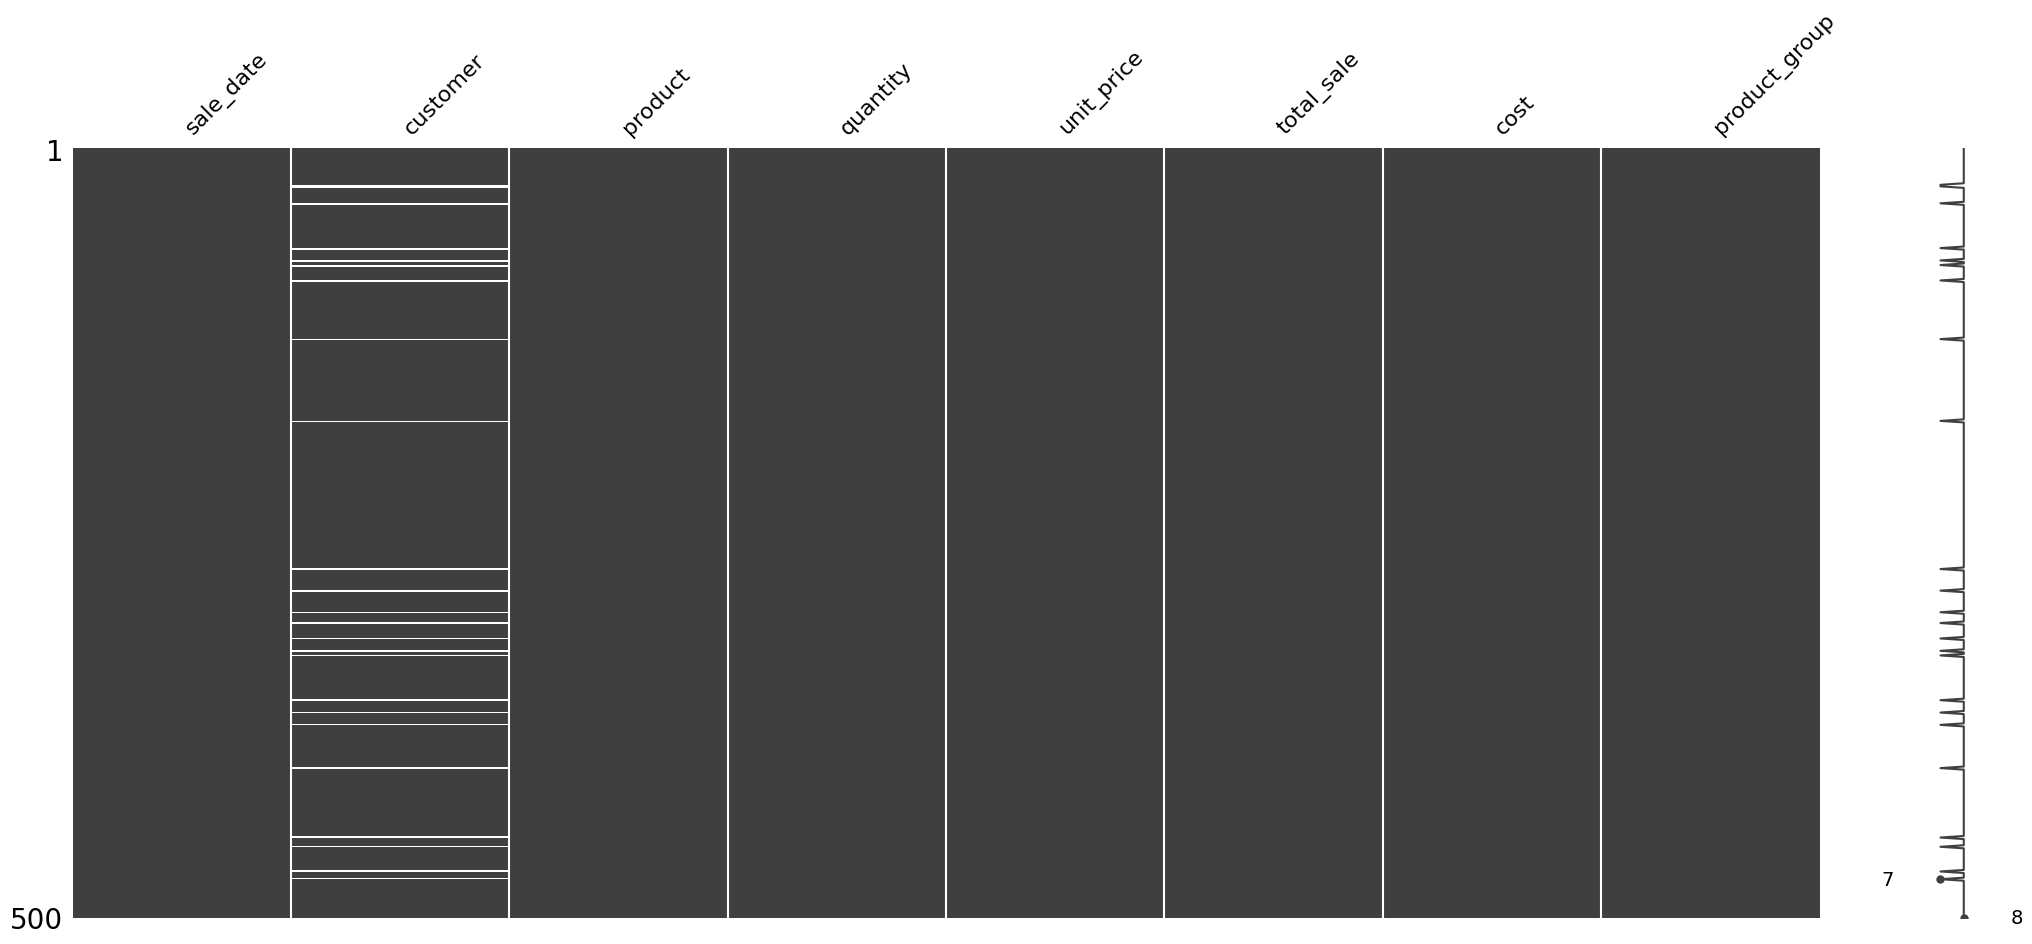

In [55]:
import missingno as msno

msno.matrix(sales_df.sort_values(by = 'sale_date'));

Como é possível observar no gráfico acima, não existe um padrão aparente nestes dados nulos, a distribuição deles é completamente aleatória. Desta forma, uma solução possível seria substituí-los pela moda da coluna "customer", ou seja, pelo nome do comprador que mais aparece no dataset. Porém, como são poucos dados (apenas 4,8% do total), decidiu-se por excluí-los.

In [56]:
sales_df.dropna(subset = 'customer', inplace = True)

Verificando agora a percentagem de dados nulos por coluna,

In [57]:
show_missing(sales_df)

sale_date        0.0
customer         0.0
product          0.0
quantity         0.0
unit_price       0.0
total_sale       0.0
cost             0.0
product_group    0.0
dtype: float64

Conforme o resultado acima, todos as linhas com dados nulos da coluna "customer" foram removidas do dataset.

### Dados duplicados

Verificando agora se existem linhas duplicadas no dataset,

In [58]:
sales_df.duplicated().sum()

0

Portanto, não existem linhas duplicadas.

### Estatísticas descritivas e outliers

Agora verifica-se as estatísticas descritivas das colunas com dados numéricos, exceto da coluna 'sale_date'.

In [60]:
sales_df.drop(columns = ['sale_date']).describe()

,quantity,unit_price,total_sale,cost
count,476.000000,476.000000,476.000000,476.000000
mean,4.955882,48.860168,244.875630,196.027671
std,2.538990,28.658635,201.824924,161.612099
min,1.000000,1.210000,1.670000,1.396836
25%,3.000000,24.055000,78.150000,64.314977
50%,5.000000,48.490000,194.100000,152.452833
75%,7.000000,74.492500,373.072500,295.817910
max,9.000000,99.640000,885.420000,714.784900


Interessante avaliar que na coluna "total_sale" os valores mínimo e máximo de vendas é bem discrepante um do outro, sendo um mínimo de 1,67 e o máximo de 885,42, onde 75% dos dados desta coluna são no máximo iguais a 373 aproximadamente, com pouquíssimas compras acima deste valor. Isto explica também o alto desvio padrão (201,825).

A coluna "cost" também tem comportamento semelhante a "total_sale", com um desvio padrão relativamente alto (161,61), o que corrobora com as pouquíssimas compras em valores de custo acima de 295,82.

Pela análise da coluna "quantity" temos que os produtos são comprados em média a cada 5 unidades, com um valor máximo de 9 unidades. Já pela coluna "unit_price" sabe-se que o produto mais caro tem preço unitário de 99,64, onde 75% dos produtos tem preços de até 74,50.

A seguir plotou-se gráficos do tipo boxplot, utilizando a biblioteca Seaborn, a fim de verificar a existência de outliers e visualizar as estatísticas descritivas acima calculadas. Para normatizar os dados e o gráfico não apresentar problemas de escala, visto que os valores presentes na coluna "quantity" são bem menores que os valores da coluna "total_sale" por exemplo, aplicou-se no dataset a função scale( ) da biblioteca sklearn, de tal forma que esta função converte os dados das colunas numéricas em distribuições com média igual a 0 e desvio padrão igual a 1. 

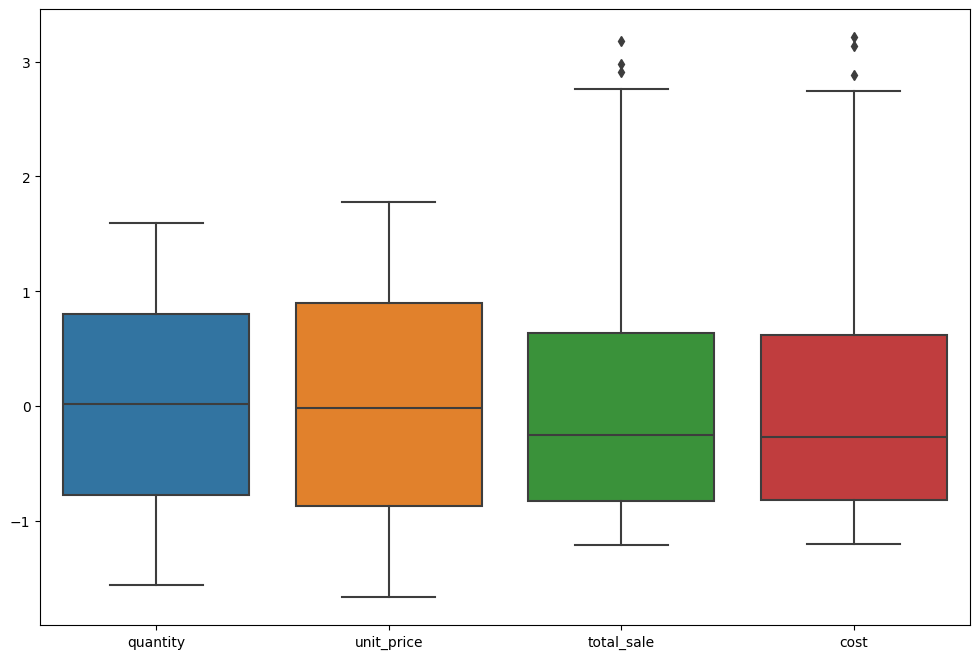

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

plt.figure(figsize = (12,8))
sns.boxplot(data = sales_df.select_dtypes('number').apply(scale))
plt.show()


Pelo gráfico acima, percebe-se que as colunas "total_sale" e "cost" apresentam 3 outliers cada uma. Para validar estas quantidades, pode-se definir uma função para calcular os outliers, conforme demonstrado abaixo, onde q1 é o primeiro quartil, q3 é o terceiro quartil e iqr é o intervalo interquartil. Utilizou-se como padrão um fator = 1.5.

In [75]:
import numpy as np

def is_outlier (array):
    q1, q3 = np.quantile(array, [0.25, 0.75])
    iqr = q3-q1

    upper_outlier = q3 + 1.5*iqr
    lower_outlier = q1 - 1.5*iqr

    return ((array<lower_outlier) | (array>upper_outlier))

Aplicando a função as colunas do dataset, somando as quantidades, tem-se os dados da quantidade de outlier por coluna numérica.

In [76]:
sales_df.select_dtypes('number').apply(is_outlier).sum()

quantity      0
unit_price    0
total_sale    3
cost          3
dtype: int64

Para este caso, como é sabido que estes outliers são naturais, ou seja, não são provenientes de erros humanos e sim consequência das colunas de "quantity" e "unit_price", eles não seram excluídos da análise. 

## Calculando as métricas

### Lucro por produto

Para ser avaliado o lucro por produto e posteriormente o produto mais lucrativo, primeiro é necessário criar a coluna com os dados de lucro. Desta forma, calcula-se o lucro a partir da venda total menos o preço de custo, conforme demonstrado abaixo.

In [77]:
sales_df['profit'] = sales_df['total_sale'] - sales_df['cost']

In [78]:
sales_df.head()

,sale_date,customer,product,quantity,unit_price,total_sale,cost,product_group,profit
sale_id,,,,,,,,,
0,2020-01-01 00:00:00.000000000,José,Produto C,4,32.18,128.72,112.392212,C,16.327788
1,2020-01-01 17:33:18.396793587,Paulo,Produto A,9,67.42,606.78,505.560688,B,101.219312
2,2020-01-02 11:06:36.793587174,José,Produto C,1,14.92,14.92,12.334824,A,2.585176
3,2020-01-03 04:39:55.190380761,Maria,Produto B,9,65.09,585.81,472.851216,C,112.958784
4,2020-01-03 22:13:13.587174348,Ana,Produto B,8,28.02,224.16,174.989413,B,49.170587


Assim, agrupa-se o dataset por produto, mostrando a média de lucro por produto.

In [85]:
profit_by_product = round(sales_df.groupby(by = 'product')['profit'].agg('mean').sort_values(ascending = False).reset_index(), 2)
profit_by_product

,product,profit
0,Produto D,54.61
1,Produto B,50.24
2,Produto A,45.17
3,Produto C,43.70


Plotando um gráfico de barras do resultado acima,

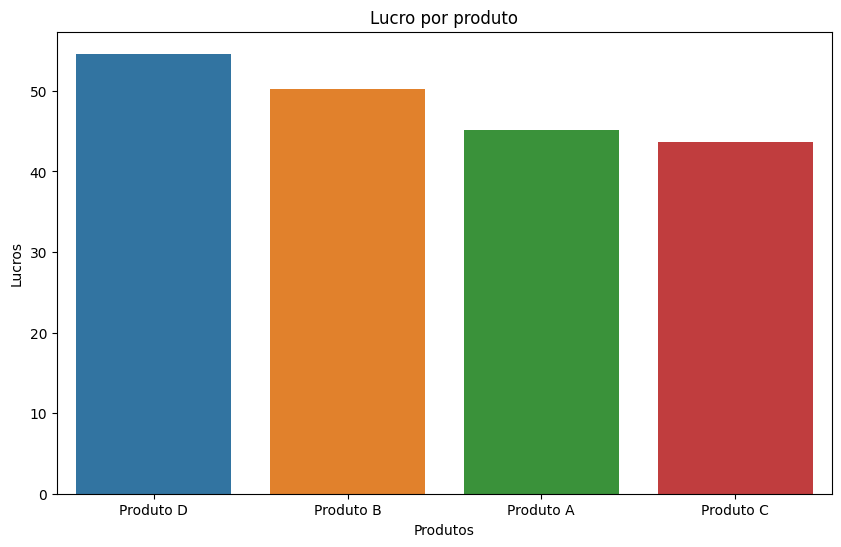

In [88]:
plt.figure(figsize=(10,6))
sns.barplot(data = profit_by_product, x = 'product', y = 'profit')
plt.xlabel('Produtos')
plt.ylabel('Lucros')
plt.title('Lucro por produto')
plt.show()

### Produto mais lucrativo

In [86]:
profit_by_product.head(1)

,product,profit
0,Produto D,54.61


Conforme demonstrado acima, o produto mais lucrativo é o Produto D, com 54,61 de lucro médio.

### Produtos mais e menos vendidos

Para calcular os produtos mais e menos vendidos, agrupou-se novamente o dataset por produto, mostrando agora as quantidades vendidas de cada um.

In [87]:
quantity_by_product = sales_df.groupby(by = 'product')['quantity'].agg('sum').sort_values(ascending = False).reset_index()
quantity_by_product

,product,quantity
0,Produto D,678
1,Produto B,622
2,Produto C,541
3,Produto A,518


Conforme os resultados acima expostos, o produto mais vendido foi o Produto D, com 678 unidades vendidas. Já o produto menos vendido foi o produto A, com 518 unidades vendidas.

Demonstrando isso graficamente,

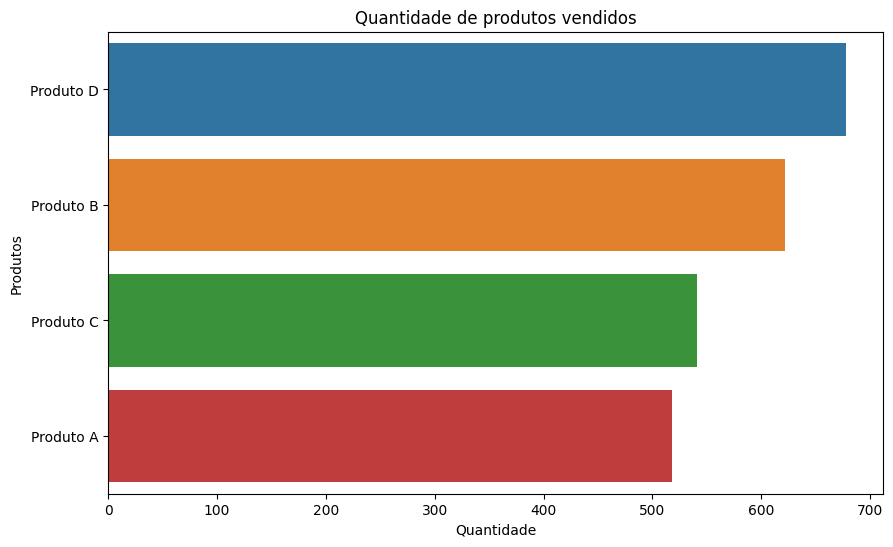

In [95]:
plt.figure(figsize=(10,6))
sns.barplot(data=quantity_by_product, x = 'quantity', y = 'product')
plt.xlabel('Quantidade')
plt.ylabel('Produtos')
plt.title('Quantidade de produtos vendidos')
plt.show()

### 5 primeiros clientes que mais compram

### Frequência de compra por cliente